In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('plants.csv')

In [3]:
df.head()

,Plant Name,Scientific Name,Medical Uses,Toxicity,Medical Use Category
0,Aloe Vera,Aloe barbadensis,Used for skin burns and wounds,No,Skin Care
1,Echinacea,Echinacea purpurea,Boosts immune system,No,Immune Support
2,Belladonna,Atropa belladonna,Used in pain relief and muscle spasms,Yes,Pain Relief
3,Lavender,Lavandula angustifolia,Used for anxiety and insomnia,No,Relaxation
4,Foxglove,Digitalis purpurea,Used to treat heart conditions,Yes,Heart Health


In [100]:
df.drop(columns=['Scientific Name'], inplace=True)

In [101]:
df.head()

,Plant Name,Medical Uses,Toxicity,Medical Use Category
0,Aloe Vera,Used for skin burns and wounds,No,Skin Care
1,Echinacea,Boosts immune system,No,Immune Support
2,Belladonna,Used in pain relief and muscle spasms,Yes,Pain Relief
3,Lavender,Used for anxiety and insomnia,No,Relaxation
4,Foxglove,Used to treat heart conditions,Yes,Heart Health


In [102]:
df.drop_duplicates(inplace=True)

In [103]:
df['Toxicity'] = df['Toxicity'].map({'Yes': 1, 'No': 0})

In [104]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Medical Use Category'] = label_encoder.fit_transform(df['Medical Use Category'])

In [105]:
df.head()

,Plant Name,Medical Uses,Toxicity,Medical Use Category
0,Aloe Vera,Used for skin burns and wounds,0,20
1,Echinacea,Boosts immune system,0,10
2,Belladonna,Used in pain relief and muscle spasms,1,16
3,Lavender,Used for anxiety and insomnia,0,17
4,Foxglove,Used to treat heart conditions,1,9


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Medical Use Category'] = label_encoder.fit_transform(df['Medical Use Category'])

In [107]:
df.head()

,Plant Name,Medical Uses,Toxicity,Medical Use Category
0,Aloe Vera,Used for skin burns and wounds,0,20
1,Echinacea,Boosts immune system,0,10
2,Belladonna,Used in pain relief and muscle spasms,1,16
3,Lavender,Used for anxiety and insomnia,0,17
4,Foxglove,Used to treat heart conditions,1,9


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [109]:
vectorizer = TfidfVectorizer()

In [110]:
X = vectorizer.fit_transform(df['Plant Name'])
y_toxicity = df['Toxicity']
X_test_toxicity, y_train_toxicity, y_test_toxicity = train_test_split(X, y_toxicity, test_size=0.2, random_state=42)_train_toxicity, X

In [111]:
from sklearn.ensemble import RandomForestClassifier
toxicity_model = RandomForestClassifier()
toxicity_model.fit(X_train_toxicity, y_train_toxicity)

RandomForestClassifier()

In [112]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [113]:
y_pred_toxicity = toxicity_model.predict(X_test_toxicity)
print("Toxicity Prediction Report:")
print(classification_report(y_test_toxicity, y_pred_toxicity))
print("Accuracy:", accuracy_score(y_test_toxicity, y_pred_toxicity))

Toxicity Prediction Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18

Accuracy: 0.8888888888888888


C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [114]:
y_medical_use = df['Medical Use Category']
X_train_medical, X_test_medical, y_train_medical, y_test_medical = train_test_split(X, y_medical_use, test_size=0.2, random_state=42)

In [131]:
medical_use_model = RandomForestClassifier()

In [141]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [143]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=medical_use_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_medical, y_train_medical)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [145]:
grid_search = GridSearchCV(estimator=medical_use_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_medical, y_train_medical)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [146]:
best_medical_use_model = grid_search.best_estimator_

In [147]:
y_pred_medical = best_medical_use_model.predict(X_test_medical)
print("Medical Use Category Prediction Report:")
print(classification_report(y_test_medical, y_pred_medical))
print("Accuracy:", accuracy_score(y_test_medical, y_pred_medical))

Medical Use Category Prediction Report:
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.07      1.00      0.12         1
          15       0.00      0.00      0.00         1
          16       1.00      0.50      0.67         2
          17       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         1

    accuracy                           0.17        18
   macro avg       0.17      0.21      0.15        18
weighted avg       0.17      0.17      0.14        18

Accuracy: 0.16666666666666666


C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [116]:
y_pred_medical = medical_use_model.predict(X_test_medical)
print("Medical Use Category Prediction Report:")
print(classification_report(y_test_medical, y_pred_medical))
print("Accuracy:", accuracy_score(y_test_medical, y_pred_medical))

Medical Use Category Prediction Report:
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.07      1.00      0.12         1
          15       0.00      0.00      0.00         1
          16       1.00      0.50      0.67         2
          17       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         1

    accuracy                           0.17        18
   macro avg       0.17      0.21      0.15        18
weighted avg       0.17      0.17      0.14        18

Accuracy: 0.16666666666666666


C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [151]:
best_medical_use_model.score(X_test_medical, y_test_medical)

0.16666666666666666

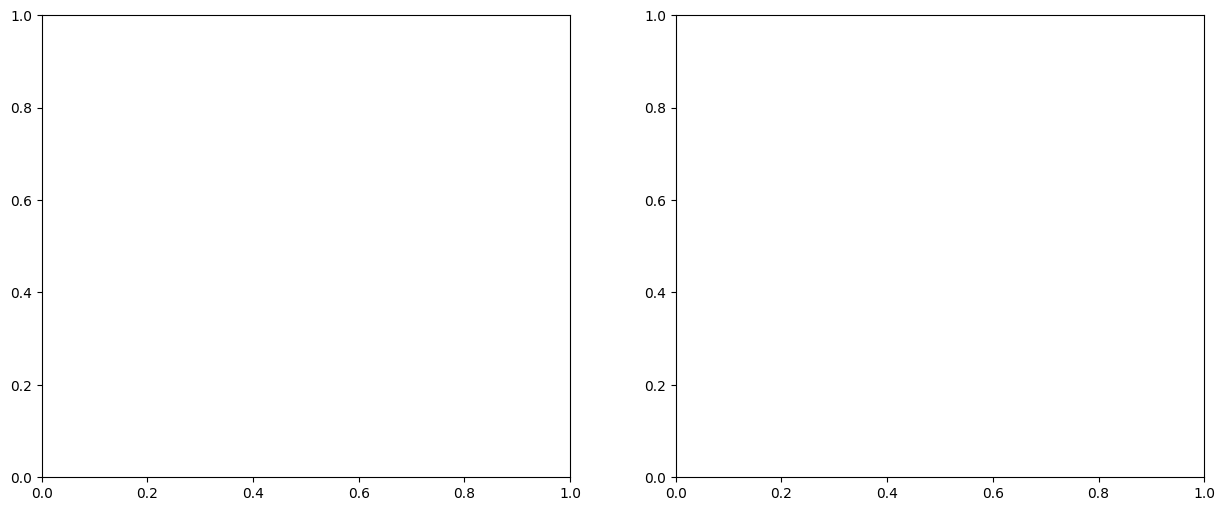

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

In [122]:
conf_matrix_toxicity = confusion_matrix(y_test_toxicity, y_pred_toxicity)
sns.heatmap(conf_matrix_toxicity, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Toxicity Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

Text(158.22222222222223, 0.5, 'Actual')

In [123]:
conf_matrix_medical = confusion_matrix(y_test_medical, y_pred_medical)
sns.heatmap(conf_matrix_medical, annot=True, fmt='d', cmap='Blues', ax=ax[1], xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
ax[1].set_title('Medical Use Category Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

Text(792.3131313131312, 0.5, 'Actual')

In [124]:
plt.show()

In [128]:
toxicity_model.score(X_test_toxicity, y_test_toxicity)

0.8888888888888888

In [130]:
medical_use_model.score(X_test_medical,y_test_medical) 

0.16666666666666666

In [152]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 2.6 MB/s eta 0:00:48
   ---------------------------------------- 0.3/124.9 MB 3.2 MB/s eta 0:00:40
   ---------------------------------------- 0.5/124.9 MB 3.5 MB/s eta 0:00:36
   ---------------------------------------- 0.6/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 0.7/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 0.9/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.1/124.9 MB 3.6 MB/s eta 0:00:34
   ---------------------------------------- 1.3/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 1.5/124.9 MB 3.7 MB/s eta 0:00:34
    --------------------------------------- 1.6/124.9 MB 3.7 MB/s eta 0:00:34
    --------------------------------------- 1.7/124.9 MB 3.6 MB/s eta 0

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [154]:
import xgboost as xgb

In [155]:
y_medical_use_2 = df['Medical Use Category']
X_train_medical, X_test_medical, y_train_medical, y_test_medical = train_test_split(X, y_medical_use, test_size=0.2, random_state=42)

In [156]:
medical_use_model_2 = xgb.XGBClassifier()

In [157]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [166]:
from sklearn.model_selection import  GridSearchCV

In [170]:
grid_search = GridSearchCV(estimator=medical_use_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_medical, y_train_medical)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


ValueError: Invalid parameter 'colsample_bytree' for estimator RandomForestClassifier(). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [169]:
df

,Plant Name,Medical Uses,Toxicity,Medical Use Category
0,Aloe Vera,Used for skin burns and wounds,0,20
1,Echinacea,Boosts immune system,0,10
2,Belladonna,Used in pain relief and muscle spasms,1,16
3,Lavender,Used for anxiety and insomnia,0,17
4,Foxglove,Used to treat heart conditions,1,9
...,...,...,...,...
83,Myrrh,Used for antiseptic and anti-inflammatory prop...,0,3
84,Noni,Used for immune support and pain relief,0,10
85,Pau D'Arco,Used for infections and anti-inflammatory prop...,0,10
86,Reishi,Boosts immune system and reduces stress,0,10
